In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.widgets import TextBox
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "/Users/kassyedwards/Desktop/MatPlotLibHW/city_data.csv"
ride_data_to_load = "/Users/kassyedwards/Desktop/MatPlotLibHW/ride_data.csv"

# Read the City and Ride Data
city_data= pd.read_csv(city_data_to_load)
ride_data= pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
#merge_table = pd.merge(ride_data, city_data, on="city", how="left")
merge_table=city_data.merge(ride_data)
# Display the data table for preview
merge_table.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [190]:
urban_loc = merge_table.loc[merge_table['type']== 'Urban']
urbanx=urban_loc.groupby(["type","city"])["fare"].count()
urbany=urban_loc.groupby(["type", "city"])["fare"].mean()
urbanxy=urban_loc.groupby(["type", "city"])["driver_count"].first()

sub_loc = merge_table.loc[merge_table['type']=='Suburban']
subx=sub_loc.groupby(["type","city"])["fare"].count()
suby=sub_loc.groupby(["type", "city"])["fare"].mean()
subxy=sub_loc.groupby(["type", "city"])["driver_count"].first()

rural_loc = merge_table.loc[merge_table['type']=='Rural']
ruralx=rural_loc.groupby(["type","city"])["fare"].count()
ruraly=rural_loc.groupby(["type", "city"])["fare"].mean()
ruralxy=rural_loc.groupby(["type", "city"])["driver_count"].first()

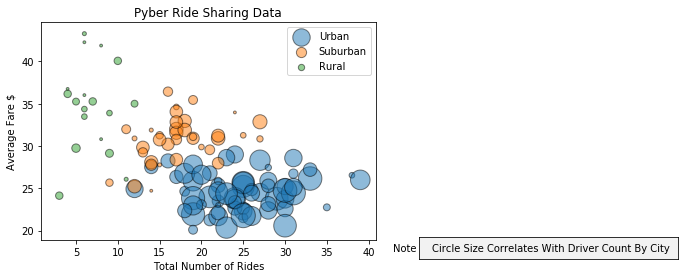

In [358]:
urban_scatter = plt.scatter(urbanx, urbany, s=urbanxy*8, marker="o", alpha=0.5, edgecolors="black")
suburban_scatter = plt.scatter(subx, suby, s=subxy*8, marker="o", alpha=0.5, edgecolors="black")
rural_scatter = plt.scatter(ruralx, ruraly, s=ruralxy*8, marker="o", alpha=0.5, edgecolors="black")
# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare $")
# Create a legend

leg = plt.legend((urban_scatter, suburban_scatter, rural_scatter), ("Urban","Suburban","Rural"), scatterpoints=1, loc= "upper right")

# Incorporate a text label regarding circle size
axbox = plt.axes([1, 0.06, 0.6, 0.075])
text_box = TextBox(axbox, 'Note', initial="Circle Size Correlates With Driver Count By City")
# Save Figure
plt.savefig("total_scatter.png")

## Total Fares by City Type

In [267]:
# Calculate Type Percents
count_fares = merge_table.groupby(["type"]).sum()
count_fares

,driver_count,fare,ride_id
type,,,
Rural,537,4327.93,580968240341287
Suburban,8570,19356.33,3106884522576766
Urban,59602,39854.38,7919412664056093


In [278]:
pre_percent= count_fares["fare"]

In [279]:
pre_percent

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [283]:
rural_p=pre_percent[0]
suburban_p=pre_percent[1]
urban_p=pre_percent[2]
total_p=pre_percent.sum()

In [287]:
rural_fares= (rural_p/total_p)*100

rural_fares

6.8114929749834126

In [289]:
suburban_fares=(suburban_p/total_p)*100
suburban_fares

30.463872062732218

In [290]:
urban_fares=(urban_p/total_p)*100
urban_fares

62.72463496228438

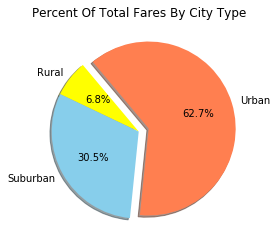

<Figure size 432x288 with 0 Axes>

In [357]:
# Build Pie Chart
types=["Rural", "Suburban","Urban" ]
all_percents1= [rural_fares, suburban_fares, urban_fares]
explode =  (0,0,0.12)
colors = ["yellow","skyblue", "coral"]
Fares_pie = plt.pie(all_percents1, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
plt.title("Percent Of Total Fares By City Type")
plt.show()
plt.savefig("total_fares.png")

## Total Rides by City Type

In [63]:
count_types = merge_table.groupby("type").nunique(["city"])
count_types.head()

,city,date,fare,ride_id,driver_count,type
type,,,,,,
Rural,18,125,122,125,7,1
Suburban,36,625,584,625,18,1
Urban,66,1625,1346,1625,45,1


In [211]:
# Calculate Ride Percents
percents = merge_table["type"].value_counts("Rural")
percents

Urban       0.684211
Suburban    0.263158
Rural       0.052632
Name: type, dtype: float64

In [ ]:
#need to programatically pull the numbers into the chart instead of hard coding

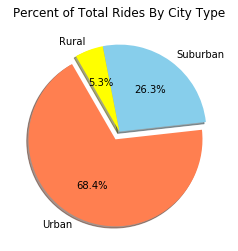

<Figure size 432x288 with 0 Axes>

In [356]:
# Build Pie Chart
types=["Urban", "Suburban", "Rural"]
all_percents = [68.42, 26.31, 5.26]
explode =  (0.1,0,0)
colors = ["coral","skyblue", "yellow"]
city_pie = plt.pie(all_percents, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Percent of Total Rides By City Type")
plt.show()
# Save Figure
plt.savefig("total_ride.png")

## Total Drivers by City Type

In [339]:
urbanxy=urban_loc.groupby(["type", "city"])["driver_count"].first()
total_urb_drivers=urbanxy.sum() 

In [340]:
subxy=sub_loc.groupby(["type", "city"])["driver_count"].first()
total_sub_drivers=subxy.sum()

In [341]:
ruralxy=rural_loc.groupby(["type", "city"])["driver_count"].first()
total_rural_drivers=ruralxy.sum()

In [343]:
all_drivers=total_urb_drivers+total_sub_drivers+total_rural_drivers
all_drivers

2973

In [344]:
r_driver_p=(total_rural_drivers/all_drivers)*100
s_driver_p=(total_sub_drivers/all_drivers)*100
u_driver_p=(total_urb_drivers/all_drivers)*100

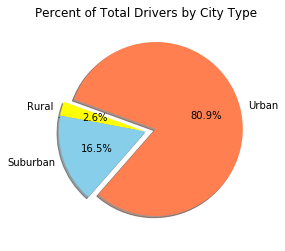

<Figure size 432x288 with 0 Axes>

In [355]:
# Calculate Driver Percents

# Build Pie Charts
types=["Rural", "Suburban", "Urban"]
all_percents2 = [r_driver_p, s_driver_p, u_driver_p]
explode =  (0,0,0.12)
colors = ["yellow","skyblue", "coral"]
city_pie = plt.pie(all_percents2, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("Percent of Total Drivers by City Type")
plt.show()
# Save Figure
plt.savefig("total_drivers.png")